In [1]:
import praw
import pandas as pd
import time
import matplotlib.pyplot as plt

In [2]:
CLIENT_ID = "instert-client_id"
CLIENT_SECRET = "insert_client_secret"
USER_AGENT = f'python:{CLIENT_ID}:0.1 (by / u/insert_user_agent)'

In [3]:
api = praw.Reddit(
    client_id = CLIENT_ID,
    client_secret = CLIENT_SECRET,
    user_agent = USER_AGENT
    )

In [4]:
# Transform the submissions in a new list with a dictionary per submission.
submissions = api.subreddit("lifehacks").hot(limit = 500)
items = []

for submission in submissions:
    item = {
        "author" : submission.author,
        "time" : time.ctime(submission.created),
        "score" : submission.score,
        "comments" : submission.num_comments,
        "title" : submission.title,
        "id" : submission.id
    }
    items.append(item)

In [5]:
# Create DataFrame and show the first 5 items.
df = pd.DataFrame(items)
df.head()

,author,comments,id,score,time,title
0,bcornello,163,9qk5k0,433,Tue Oct 23 11:19:06 2018,I made an app that helps people find the perfe...
1,Dumbodonkus,508,9q9g5b,8319,Mon Oct 22 12:12:51 2018,How to get the butter to the bottom of the pop...
2,moonordie,0,9qnr7g,0,Tue Oct 23 20:43:17 2018,If you're on a date and bad with names
3,Cerberus1349,97,9q3zdj,3522,Mon Oct 22 00:38:53 2018,Taking a pizza a long way home? Use one of tho...
4,dkepp87,9,9qk0lm,2,Tue Oct 23 11:01:20 2018,Anyone know a hack for a makeshift zipper inse...


In [6]:
#Count the number of submissions by author in the dataframe and show the first 10.
df_count = df["author"].value_counts().head(10)
df_count

MagicCards_youtube    10
Mari1aAW               4
curlysass              3
Phire_free             3
geekman20              3
EasyBusyLA             3
TiltedArc              2
scarymum               2
randomusefulbits       2
yesnoornext            2
Name: author, dtype: int64

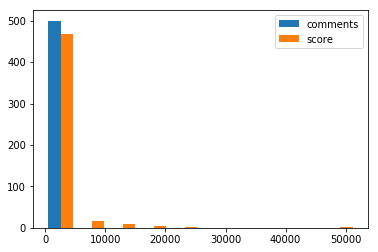

In [102]:
#Plot a histogram with ten bins for both the comment count and score of all the submissions.

x = df["comments"]
y = df["score"]
bins = 10

plt.hist([x, y], bins, label=['comments', 'score'])
plt.legend(loc='upper right')
plt.show()

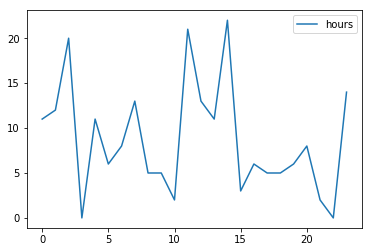

In [8]:
df["hours"] = df["time"].str[11:13]

# Convert object to numeric
df.hours = pd.to_numeric(df.hours)

# Plot the comments per hour
df[0:24].plot (y = "hours")

In [9]:
#Get the submission with the most comments and for that submission, get the comments, 
#and transform those into a DataFrame containing the comment's author name and score. 
#Note that you need to take into account the 'MoreComments' instances (look in the 
#examples notebook) and that some comments might not have an author. Display the first 
#five items in this new dataframe.

author_most_comments = df.sort_values("comments").tail(1)
author_most_comments

,author,comments,id,score,time,title,hours
415,ZZbrew,1148,9cd4ix,51661,Mon Sep 3 02:01:29 2018,I wanted natural light in a basement that has ...,2


In [10]:
# Get the id from the author with the most comments.
id_comments = author_most_comments["id"]
id_comments = list(id_comments)
id_comments = id_comments[0]

In [54]:
# Create a new Pandas dataframe with the comments in a list and show the first five items.

most_comments = []

for comment in api.submission(id = id_comments).comments:
    if isinstance(comment, praw.models.MoreComments):
        continue
    most_comments.append({
        "body" : comment.body,
        "score" : comment.score,
        "author" : str(comment.author) #convert author to string
    })
    
df_mostcomments = pd.DataFrame(most_comments)
df_mostcomments.head()

,author,body,score
0,SnowyTom,If you used RGB LEDs that are able to change c...,6775
1,stimulatedneuron,My uncle has something similar installed in th...,1857
2,bimmer123,"Marion's Piazza in the Dayton, OH area does th...",367
3,SarkastikAmbassador,Not sure if this would quell or contribute to ...,727
4,securicorscares,Dangerous. Like when we carpeted the garage an...,102


In [98]:
# Use groupby to group the authors and make a sum of the scores per author
df_sumcomments = df_mostcomments.groupby("author")["score"].sum().sort_values(ascending = False)
df_sumcomments.head()

author
SnowyTom               6775
stimulatedneuron       1857
SarkastikAmbassador     727
bimmer123               367
ResorbedTwin            350
Name: score, dtype: int64

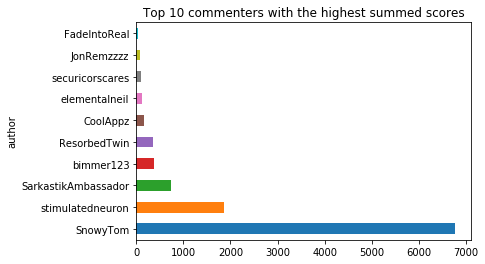

In [101]:
df_sumcomments[0:10].plot (kind = "barh", y = ["score"], title = "Top 10 commenters with the highest summed scores", x = "author")